<a href="https://colab.research.google.com/github/MiHarsh/ML-LIBRARY-1/blob/master/Vectorized_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

In [0]:
df=pd.read_csv("/content/sample_data/mnist_train_small.csv")
df.head()

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.551,0.552,0.553,0.554,0.555,0.556,0.557,0.558,0.559,0.560,0.561,0.562,0.563,0.564,0.565,0.566,0.567,0.568,0.569,0.570,0.571,0.572,0.573,0.574,0.575,0.576,0.577,0.578,0.579,0.580,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
df.describe()

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.551,0.552,0.553,0.554,0.555,0.556,0.557,0.558,0.559,0.560,0.561,0.562,0.563,0.564,0.565,0.566,0.567,0.568,0.569,0.570,0.571,0.572,0.573,0.574,0.575,0.576,0.577,0.578,0.579,0.580,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
count,19999.000000,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.000000,19999.000000,19999.000000,19999.000000,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,...,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.0,19999.0,19999.0,19999.0
mean,4.470124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000500,0.010801,0.010801,0.000450,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012401,0.028451,0.058303,0.065503,0.127556,...,3.714036,2.627231,1.718486,1.020101,0.553228,0.247412,0.097755,0.020751,0.001400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000350,0.010651,0.036052,0.088304,0.112306,0.158508,0.276914,0.406070,0.546827,0.572079,0.696235,0.671684,0.545927,0.366318,0.215011,0.087704,0.036502,0.013651,0.032602,0.006000,0.0,0.0,0.0,0.0
std,2.892807,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.070712,1.527389,1.527389,0.063641,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.233369,1.986589,3.473328,3.100786,5.003077,...,26.815104,22.334578,18.262801,14.000786,10.463422,6.750766,4.079112,1.322117,0.197995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.049499,1.095106,2.220820,3.900144,4.749952,5.406774,7.005300,8.719149,10.379141,10.254843,11.457391,11.297264,10.057330,8.255546,6.314821,3.921664,2.712527,0.950818,2.718102,0.600333,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.

In [0]:
xa=df.drop(["6"],axis=1)
xa.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,...,0.551,0.552,0.553,0.554,0.555,0.556,0.557,0.558,0.559,0.560,0.561,0.562,0.563,0.564,0.565,0.566,0.567,0.568,0.569,0.570,0.571,0.572,0.573,0.574,0.575,0.576,0.577,0.578,0.579,0.580,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
ya=df["6"]
ya.head()

0    5
1    7
2    9
3    5
4    2
Name: 6, dtype: int64

In [0]:
def feature_normalize(X):
    n_features = X.shape[1]
    means = np.array([np.mean(X.iloc[i,:]) for i in range(n_features)])
    stddevs = np.array([np.std(X.iloc[i,:]) for i in range(n_features)])
    normalized = (X - means) / stddevs
    return normalized

In [0]:
X=feature_normalize(xa)


,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,...,0.551,0.552,0.553,0.554,0.555,0.556,0.557,0.558,0.559,0.560,0.561,0.562,0.563,0.564,0.565,0.566,0.567,0.568,0.569,0.570,0.571,0.572,0.573,0.574,0.575,0.576,0.577,0.578,0.579,0.580,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,-0.425694,-0.424341,-0.447519,-0.420972,-0.460217,-0.539459,-0.340386,-0.486621,-0.466122,-0.539016,-0.422869,-0.489841,-0.436053,-0.381829,-0.353047,-0.541568,-0.499814,-0.277715,-0.326357,-0.374659,-0.383183,-0.407905,-0.398939,-0.403362,-0.495767,-0.48472,-0.386547,-0.398218,-0.374603,-0.291342,-0.435266,-0.4735,-0.410338,-0.347619,-0.320562,-0.297396,-0.536002,-0.317351,-0.461139,-0.364867,...,-0.355987,-0.479285,-0.342102,-0.335194,-0.471416,-0.463398,-0.456882,-0.50715,-0.470469,-0.374299,-0.335708,-0.394639,-0.341532,-0.412463,-0.379093,-0.488345,-0.417622,-0.427698,-0.444401,-0.38998,-0.404753,-0.384821,-0.443676,-0.595337,-0.40033,-0.312351,-0.455062,-0.531928,-0.451934,-0.434465,-0.515635,-0.499285,-0.410905,-0.384523,-0.479074,-0.385556,-0.418796,-0.39413,-0.436066,-0.340604
1,-0.425694,-0.424341,-0.447519,-0.420972,-0.460217,-0.539459,-0.340386,-0.486621,-0.466122,-0.539016,-0.422869,-0.489841,-0.436053,-0.381829,-0.353047,-0.541568,-0.499814,-0.277715,-0.326357,-0.374659,-0.383183,-0.407905,-0.398939,-0.403362,-0.495767,-0.48472,-0.386547,-0.398218,-0.374603,-0.291342,-0.435266,-0.4735,-0.410338,-0.347619,-0.320562,-0.297396,-0.536002,-0.317351,-0.461139,-0.364867,...,-0.355987,-0.479285,-0.342102,-0.335194,-0.471416,-0.463398,-0.456882,-0.50715,-0.470469,-0.374299,-0.335708,-0.394639,-0.341532,-0.412463,-0.379093,-0.488345,-0.417622,-0.427698,-0.444401,-0.38998,-0.404753,-0.384821,-0.443676,-0.595337,-0.40033,-0.312351,-0.455062,-0.531928,-0.451934,-0.434465,-0.515635,-0.499285,-0.410905,-0.384523,-0.479074,-0.385556,-0.418796,-0.39413,-0.436066,-0.340604
2,-0.425694,-0.424341,-0.447519,-0.420972,-0.460217,-0.539459,-0.340386,-0.486621,-0.466122,-0.539016,-0.422869,-0.489841,-0.436053,-0.381829,-0.353047,-0.541568,-0.499814,-0.277715,-0.326357,-0.374659,-0.383183,-0.407905,-0.398939,-0.403362,-0.495767,-0.48472,-0.386547,-0.398218,-0.374603,-0.291342,-0.435266,-0.4735,-0.410338,-0.347619,-0.320562,-0.297396,-0.536002,-0.317351,-0.461139,-0.364867,...,-0.138263,-0.479285,-0.342102,-0.335194,-0.471416,-0.463398,-0.456882,-0.50715,-0.470469,-0.374299,-0.335708,-0.394639,-0.341532,-0.412463,-0.379093,-0.488345,-0.417622,-0.427698,-0.444401,-0.38998,-0.404753,-0.384821,-0.443676,-0.595337,-0.40033,-0.312351,-0.455062,-0.531928,-0.451934,-0.434465,-0.515635,-0.499285,-0.410905,-0.384523,-0.479074,-0.385556,-0.418796,-0.39413,-0.436066,-0.340604
3,-0.425694,-0.424341,-0.447519,-0.420972,-0.460217,-0.539459,-0.340386,-0.486621,-0.466122,-0.539016,-0.422869,-0.489841,-0.436053,-0.381829,-0.353047,-0.541568,-0.499814,-0.277715,-0.326357,-0.374659,-0.383183,-0.407905,-0.398939,-0.403362,-0.495767,-0.48472,-0.386547,-0.398218,-0.374603,-0.291342,-0.435266,-0.4735,-0.410338,-0.347619,-0.320562,-0.297396,-0.536002,-0.317351,-0.461139,-0.364867,...,-0.355987,-0.479285,-0.342102,-0.335194,-0.471416,-0.463398,-0.456882,-0.50715,-0.470469,-0.374299,-0.335708,-0.394639,-0.341532,-0.412463,-0.379093,-0.488345,-0.417622,-0.427698,-0.444401,-0.38998,-0.404753,-0.384821,-0.443676,-0.595337,-0.40033,-0.312351,-0.455062,-0.531928,-0.451934,-0.434465,-0.515635,-0.499285,-0.410905,-0.384523,-0.479074,-0.385556,-0.418796,-0.39413,-0.436066,-0.340604
4,-0.425694,-0.424341,-0.447519,-0.420972,-0.460217,-0.539459,-0.340386,-0.486621,-0.466122,-0.539016,-0.422869,-0.489841,-0.436053,-0.381829,-0.353047,-0.541568,-0.499814,-0.277715,-0.326357,-0.374659,-0.383183,-0.407905,-0.398939,-0.403362,-0.495767,-0.48472,-0.386547,-0.398218,-0.374603,-0.291342,-0.435266,-0.4735,-0.410338,-0.347619,-0.320562,-0.297396,-0.536002,-0

In [0]:
X=np.column_stack((np.ones(len(X)),X))


array([[ 1.        , -0.42569399, -0.42434129, ..., -0.39413045,
        -0.43606584, -0.34060378],
       [ 1.        , -0.42569399, -0.42434129, ..., -0.39413045,
        -0.43606584, -0.34060378],
       [ 1.        , -0.42569399, -0.42434129, ..., -0.39413045,
        -0.43606584, -0.34060378],
       ...,
       [ 1.        , -0.42569399, -0.42434129, ..., -0.39413045,
        -0.43606584, -0.34060378],
       [ 1.        , -0.42569399, -0.42434129, ..., -0.39413045,
        -0.43606584, -0.34060378],
       [ 1.        , -0.42569399, -0.42434129, ..., -0.39413045,
        -0.43606584, -0.34060378]])

In [0]:
def compute_cost(X, y, theta,lam):
    return (np.sum(np.square(np.dot(X, theta) - y))+lam*sum(np.square(theta))) / (2 * len(y))

In [0]:
theta = np.zeros(X.shape[1])

In [0]:
def gradient_descent_multi(X, y, theta, alpha,lam, iterations):
    theta = np.zeros(X.shape[1])
    m = len(X)
    cost=[]
    for i in range(iterations):
        gradient = (1/m) * (np.dot(X.T, np.dot(X, theta) - y))
        c=theta[0]
        theta = theta - alpha * (gradient+(1/m)*lam*sum(theta))
        theta[0]=c-alpha*(gradient[0])
        cost.append(compute_cost(X,ya,theta,lam))
    return theta,cost


In [0]:
theta,cost=gradient_descent_multi(X,ya,theta,0.001,0,6000)

Text(0, 0.5, 'Cost')

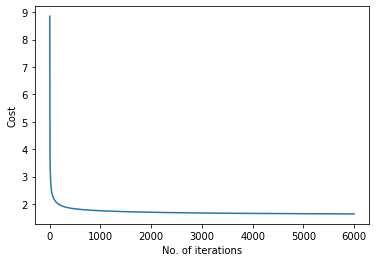

In [0]:
n_iterations = [x for x in range(1,6001)]
plt.plot(n_iterations, cost)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')

In [0]:
#IMPORTING TESTSET
dft=pd.read_csv("/content/sample_data/mnist_test.csv")
dft.head()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.628,0.629,0.630,0.631,0.632,0.633,0.634,0.635,0.636,0.637,0.638,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648,0.649,0.650,0.651,0.652,0.653,0.654,0.655,0.656,0.657,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
x_test=dft.drop(["7"],axis=1)
y_test=dft["7"]

In [0]:
x_test=feature_normalize(x_test)

In [0]:
x_test=np.column_stack((np.ones(len(x_test)),x_test))

In [0]:
y_pred=np.dot(x_test,theta)

In [0]:
#DEFINING THRESHOLD FOR ESTIMATING THE PREDICTED_DATA
def threshold(arr,t):
  ypt=[]
  for i in arr:
    if (i-int(i))<=t:
      ypt.append(int(i))
    else:
      ypt.append(int(i)+1)
  return ypt

In [0]:
def accuracy(y_pred_threshold,y):
  count=0
  for i in range(x_test.shape[0]):
    if y_pred_threshold[i]==y[i]:
      count+=1
  return (count/x_test.shape[0])*100

In [0]:
#ACCURACY
def main(y_pred,y,t):
  y_pred_threshold=threshold(y_pred,t)
  return accuracy(y_pred_threshold,y)

In [0]:
main(y_pred,y_test,0.05)

22.892289228922895